In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_selection import SelectKBest, chi2

In [2]:
dataset=pd.read_csv("StressLevelDataset.csv")

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 21 columns):
anxiety_level                   1100 non-null int64
self_esteem                     1100 non-null int64
mental_health_history           1100 non-null int64
depression                      1100 non-null int64
headache                        1100 non-null int64
blood_pressure                  1100 non-null int64
sleep_quality                   1100 non-null int64
breathing_problem               1100 non-null int64
noise_level                     1100 non-null int64
living_conditions               1100 non-null int64
safety                          1100 non-null int64
basic_needs                     1100 non-null int64
academic_performance            1100 non-null int64
study_load                      1100 non-null int64
teacher_student_relationship    1100 non-null int64
future_career_concerns          1100 non-null int64
social_support                  1100 non-null int64
peer_pres

In [4]:
dataset.describe()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,...,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000
mean,11.063636,17.777273,0.492727,12.555455,2.508182,2.181818,2.660000,2.753636,2.649091,2.518182,...,2.772727,2.772727,2.621818,2.648182,2.649091,1.881818,2.734545,2.767273,2.617273,0.996364
std,6.117558,8.944599,0.500175,7.727008,1.409356,0.833575,1.548383,1.400713,1.328127,1.119208,...,1.433761,1.414594,1.315781,1.384579,1.529375,1.047826,1.425265,1.417562,1.530958,0.821673
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,11.000000,0.000000,6.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,0.000000
50%,11.000000,19.000000,0.000000,12.000000,3.000000,2.000000,2.500000,3.000000,3.000000,2.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.500000,3.000000,1.000000
75%,16.000000,26.000000,1.000000,19.000000,3.000000,3.000000,4.000000,4.000000,3.000000,3.000000,...,4.000000,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,2.000000
max,21.000000,30.000000,1.000000,27.000000,5.000000,3.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,5.000000,5.000000,5.000000,2.000000


In [5]:
dataset.isnull().sum()

anxiety_level                   0
self_esteem                     0
mental_health_history           0
depression                      0
headache                        0
blood_pressure                  0
sleep_quality                   0
breathing_problem               0
noise_level                     0
living_conditions               0
safety                          0
basic_needs                     0
academic_performance            0
study_load                      0
teacher_student_relationship    0
future_career_concerns          0
social_support                  0
peer_pressure                   0
extracurricular_activities      0
bullying                        0
stress_level                    0
dtype: int64

In [6]:
def QuanQual(dataset):
        quan=[]
        qual=[]
        for columnname in dataset.columns:
            if(dataset[columnname].dtype=='O'):
                qual.append(columnname)
            else:
                quan.append(columnname)
        return quan,qual

In [7]:
quan,qual=QuanQual(dataset)
print(quan)
qual

['anxiety_level', 'self_esteem', 'mental_health_history', 'depression', 'headache', 'blood_pressure', 'sleep_quality', 'breathing_problem', 'noise_level', 'living_conditions', 'safety', 'basic_needs', 'academic_performance', 'study_load', 'teacher_student_relationship', 'future_career_concerns', 'social_support', 'peer_pressure', 'extracurricular_activities', 'bullying', 'stress_level']


[]

In [8]:
dataset.dtypes

anxiety_level                   int64
self_esteem                     int64
mental_health_history           int64
depression                      int64
headache                        int64
blood_pressure                  int64
sleep_quality                   int64
breathing_problem               int64
noise_level                     int64
living_conditions               int64
safety                          int64
basic_needs                     int64
academic_performance            int64
study_load                      int64
teacher_student_relationship    int64
future_career_concerns          int64
social_support                  int64
peer_pressure                   int64
extracurricular_activities      int64
bullying                        int64
stress_level                    int64
dtype: object

In [9]:
def univariate(dataset, quan):
    descriptive = pd.DataFrame(
        index=["Mean","Median","Mode","Q1:25%","Q2:50%","Q3:75%",
               "99%","Q4:100%","IQR","1.5rule","lesser","greater",
               "min","max","skewness","kurtosis","variance","standarddeviation"],
        columns=quan
    )

    for column in quan:
        series = dataset[column].dropna()

        descriptive.loc["Mean", column] = series.mean()
        descriptive.loc["Median", column] = series.median()

        mode_val = series.mode()
        descriptive.loc["Mode", column] = mode_val[0] if not mode_val.empty else 0

        q1 = series.quantile(0.25)
        q2 = series.quantile(0.50)
        q3 = series.quantile(0.75)

        descriptive.loc["Q1:25%", column] = q1
        descriptive.loc["Q2:50%", column] = q2
        descriptive.loc["Q3:75%", column] = q3
        descriptive.loc["99%", column] = series.quantile(0.99)
        descriptive.loc["Q4:100%", column] = series.max()

        IQR = q3 - q1
        descriptive.loc["IQR", column] = IQR
        descriptive.loc["1.5rule", column] = 1.5 * IQR
        descriptive.loc["lesser", column] = q1 - 1.5 * IQR
        descriptive.loc["greater", column] = q3 + 1.5 * IQR

        descriptive.loc["min", column] = series.min()
        descriptive.loc["max", column] = series.max()
        descriptive.loc["skewness", column] = series.skew()
        descriptive.loc["kurtosis", column] = series.kurtosis()
        descriptive.loc["variance", column] = series.var()
        descriptive.loc["standarddeviation", column] = series.std()

    return descriptive


In [10]:
descriptive=univariate(dataset, quan)
descriptive

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
Mean,11.0636,17.7773,0.492727,12.5555,2.50818,2.18182,2.66,2.75364,2.64909,2.51818,...,2.77273,2.77273,2.62182,2.64818,2.64909,1.88182,2.73455,2.76727,2.61727,0.996364
Median,11,19,0,12,3,2,2.5,3,3,2,...,3,2,2,2,2,2,2,2.5,3,1
Mode,13,25,0,10,1,3,1,2,2,2,...,2,2,2,2,1,3,2,2,1,0
Q1:25%,6,11,0,6,1,1,1,2,2,2,...,2,2,2,2,1,1,2,2,1,0
Q2:50%,11,19,0,12,3,2,2.5,3,3,2,...,3,2,2,2,2,2,2,2.5,3,1
Q3:75%,16,26,1,19,3,3,4,4,3,3,...,4,4,3,4,4,3,4,4,4,2
99%,21,30,1,27,5,3,5,5,5,5,...,5,5,5,5,5,3,5,5,5,2
Q4:100%,21,30,1,27,5,3,5,5,5,5,...,5,5,5,5,5,3,5,5,5,2
IQR,10,15,1,13,2,2,3,2,1,1,...,2,2,1,2,3,2,2,2,3,2
1.5rule,15,22.5,1.5,19.5,3,3,4.5,3,1.5,1.5,...,3,3,1.5,3,4.5,3,3,3,4.5,3


In [11]:
lesser=[]
greater=[]
for columnname in quan:
    if descriptive[columnname]["min"]<descriptive[columnname]["lesser"]:
        lesser.append(columnname)
    if descriptive[columnname]["max"]>descriptive[columnname]["greater"]:
        greater.append(columnname)

In [12]:
lesser

['noise_level', 'living_conditions', 'study_load']

In [13]:
print(greater)

['noise_level', 'living_conditions', 'study_load']


In [14]:
for columnname in lesser:
    dataset.loc[dataset[columnname]<descriptive[columnname]["lesser"],columnname]=descriptive[columnname]["lesser"]
    descriptive[columnname]["min"]=dataset[columnname].min()
for columnname in greater:
    dataset.loc[dataset[columnname]>descriptive[columnname]["greater"],columnname]=descriptive[columnname]["greater"]
    descriptive[columnname]["max"]=dataset[columnname].max()

# Spilt the input and output variable.

In [15]:
indep = dataset.drop("stress_level", axis=1)   # input features
depen = dataset["stress_level"]                # output

In [16]:
indep

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,safety,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying
0,14,20,0,11,2,1,2,4,2.0,3.0,3,2,3,2.0,3,3,2,3,3,2
1,15,8,1,15,5,3,1,4,3.0,1.0,2,2,1,4.0,1,5,1,4,5,5
2,12,18,1,14,2,1,2,2,2.0,2.0,3,2,2,3.0,3,2,2,3,2,2
3,16,12,1,15,4,3,1,3,4.0,2.0,2,2,2,4.0,1,4,1,4,4,5
4,16,28,0,7,2,3,5,1,3.0,2.0,4,3,4,3.0,1,2,1,5,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,11,17,0,14,3,1,3,2,2.0,2.0,2,3,2,2.0,2,3,3,2,3,3
1096,9,12,0,8,0,3,0,0,0.5,1.0,3,4,0,1.0,1,1,1,3,4,3
1097,4,26,0,3,1,2,5,2,2.0,3.0,4,4,5,1.0,4,1,3,1,2,1
1098,21,0,1,19,5,3,1,4,3.0,1.0,1,1,2,4.5,1,4,1,4,4,4


In [17]:
depen

0       1
1       2
2       1
3       2
4       1
       ..
1095    1
1096    2
1097    0
1098    2
1099    2
Name: stress_level, Length: 1100, dtype: int64

In [18]:
quan

['anxiety_level',
 'self_esteem',
 'mental_health_history',
 'depression',
 'headache',
 'blood_pressure',
 'sleep_quality',
 'breathing_problem',
 'noise_level',
 'living_conditions',
 'safety',
 'basic_needs',
 'academic_performance',
 'study_load',
 'teacher_student_relationship',
 'future_career_concerns',
 'social_support',
 'peer_pressure',
 'extracurricular_activities',
 'bullying',
 'stress_level']

In [19]:
#Stress Level & its count

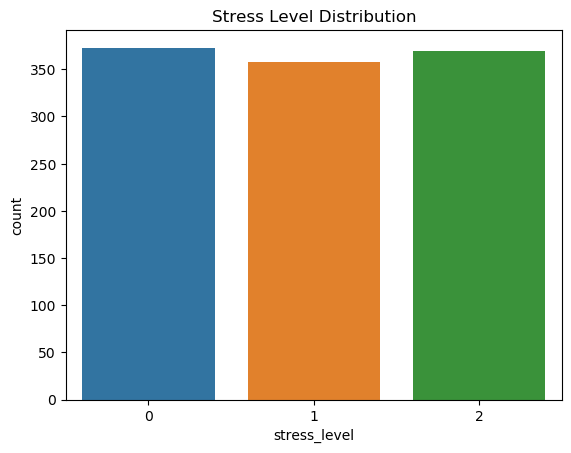

In [20]:
sns.countplot(x=depen)
plt.title("Stress Level Distribution")
plt.show()

In [21]:
#Bivariate analysis: 

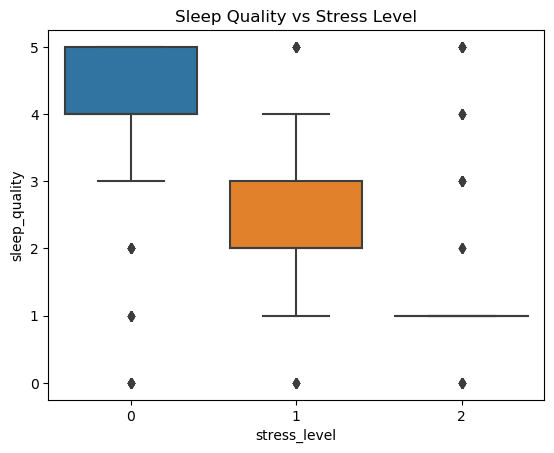

In [22]:
sns.boxplot(x=depen, y=dataset["sleep_quality"])
plt.title("Sleep Quality vs Stress Level")
plt.show()

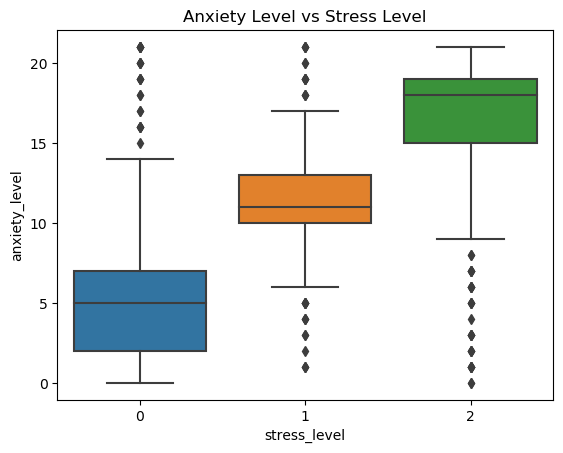

In [23]:
#Anxiety level and stress level
sns.boxplot(x=depen, y=dataset["anxiety_level"])
plt.title("Anxiety Level vs Stress Level")
plt.show()

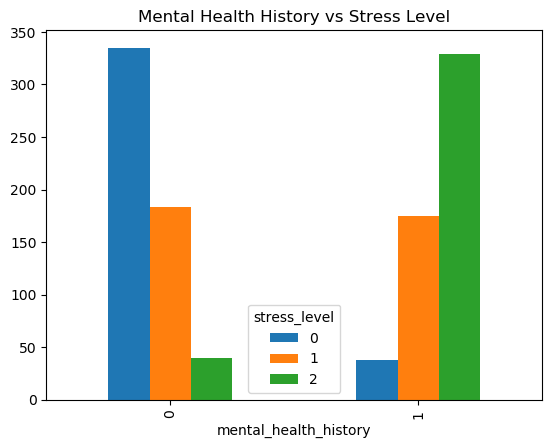

In [24]:
pd.crosstab(dataset["mental_health_history"], dataset["stress_level"]).plot(kind="bar")
plt.title("Mental Health History vs Stress Level")
plt.show()

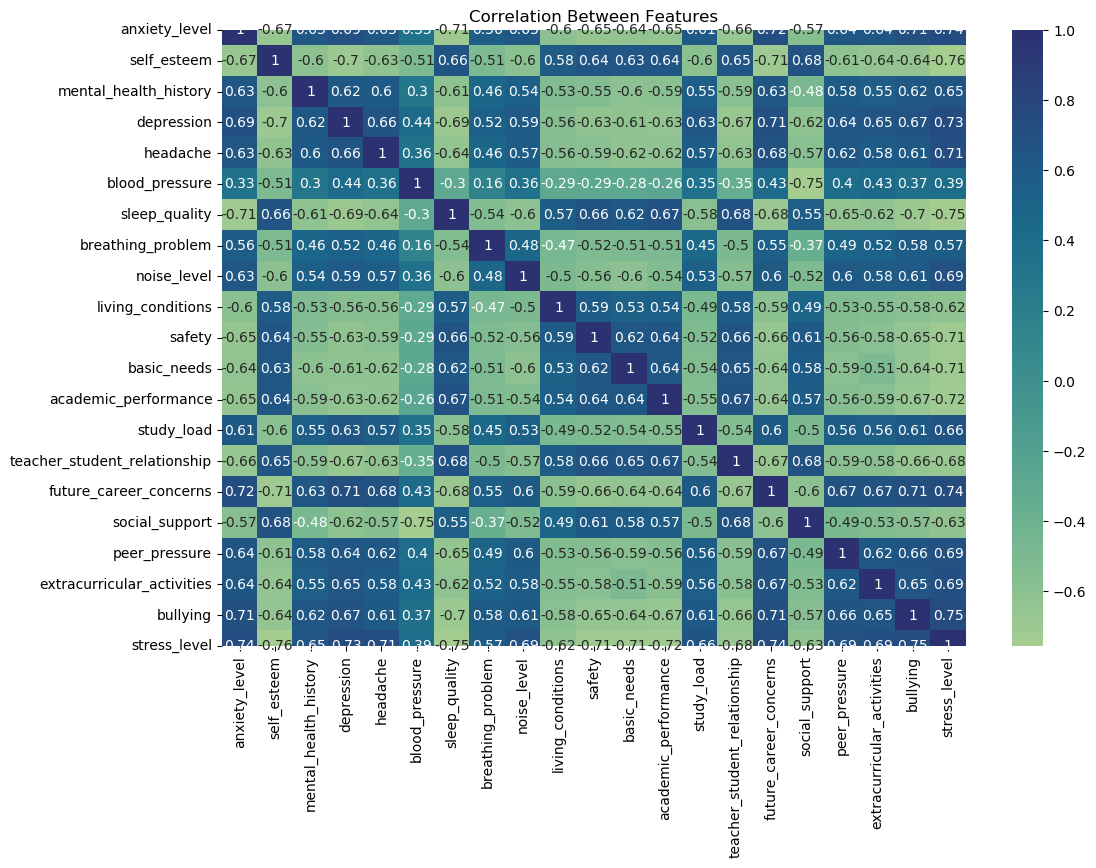

In [25]:
#correlation
plt.figure(figsize=(12,8))
sns.heatmap(dataset.corr(), annot=True, cmap="crest")
plt.title("Correlation Between Features")
plt.show()

In [26]:
dataset.corr()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
anxiety_level,1.000000,-0.672745,0.634450,0.694340,0.632738,0.330867,-0.710292,0.561654,0.629576,-0.597279,...,-0.637079,-0.649601,0.612465,-0.663176,0.717016,-0.569748,0.642910,0.641022,0.709982,0.736795
self_esteem,-0.672745,1.000000,-0.603502,-0.699602,-0.626058,-0.514692,0.662693,-0.510514,-0.595825,0.578817,...,0.631212,0.639045,-0.595704,0.652934,-0.712520,0.679211,-0.607118,-0.641202,-0.640737,-0.756195
mental_health_history,0.634450,-0.603502,1.000000,0.615882,0.604826,0.295617,-0.614146,0.464347,0.538004,-0.527010,...,-0.601196,-0.586193,0.552974,-0.587728,0.625909,-0.482560,0.580602,0.554576,0.624366,0.648644
depression,0.694340,-0.699602,0.615882,1.000000,0.657700,0.436084,-0.693161,0.522540,0.589431,-0.561312,...,-0.608776,-0.633174,0.625079,-0.673853,0.706561,-0.617972,0.635544,0.648551,0.665790,0.734379
headache,0.632738,-0.626058,0.604826,0.657700,1.000000,0.361986,-0.638771,0.461719,0.565547,-0.558083,...,-0.623199,-0.622059,0.566575,-0.625928,0.679307,-0.572988,0.622581,0.582562,0.609775,0.713484
blood_pressure,0.330867,-0.514692,0.295617,0.436084,0.361986,1.000000,-0.300323,0.162308,0.355132,-0.291434,...,-0.280590,-0.262785,0.353484,-0.352123,0.434087,-0.752531,0.401392,0.426254,0.370440,0.394200
sleep_quality,-0.710292,0.662693,-0.614146,-0.693161,-0.638771,-0.300323,1.000000,-0.541687,-0.603044,0.566114,...,0.620955,0.671326,-0.583147,0.677569,-0.682130,0.554553,-0.649098,-0.623092,-0.699427,-0.749068
breathing_problem,0.561654,-0.510514,0.464347,0.522540,0.461719,0.162308,-0.541687,1.000000,0.475120,-0.473924,...,-0.508172,-0.507251,0.448421,-0.498895,0.545345,-0.365173,0.492729,0.516884,0.576341,0.573984
noise_level,0.629576,-0.595825,0.538004,0.589431,0.565547,0.355132,-0.603044,0.475120,1.000000,-0.496421,...,-0.600840,-0.540460,0.533984,-0.566984,0.598271,-0.516129,0.598758,0.578745,0.609424,0.689143
living_conditions,-0.597279,0.578817,-0.527010,-0.561312,-0.558083,-0.291434,0.566114,-0.473924,-0.496421,1.000000,...,0.530605,0.539007,-0.488878,0.577476,-0.594494,0.493219,-0.533847,-0.548296,-0.584035,-0.616766


In [27]:
def selectkbest(indep,depen,n):
        selector = SelectKBest(score_func=chi2, k=n)
        fit1= selector.fit(indep,depen)
        x_new = fit1.transform(indep)
        return x_new,selector

In [28]:
def split_scalar(indep,depen):
        X_train, X_test, y_train, y_test = train_test_split(indep, depen, test_size = 0.25, random_state = 0)   
        return X_train, X_test, y_train, y_test    

In [29]:

def cm_prediction(classifier,X_test):
    y_pred = classifier.predict(X_test)# Making the Confusion Matrix
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y_test, y_pred)
    from sklearn.metrics import accuracy_score 
    from sklearn.metrics import classification_report 
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y_test, y_pred)
    Accuracy=accuracy_score(y_test, y_pred )
    report=classification_report(y_test, y_pred)
    return  classifier,Accuracy,report,X_test,y_test,cm

In [30]:
def selectk_Classification(acclog,accsvml,accsvmnl,accknn,accnav,accdes,accrf): 
    
    dataframe=pd.DataFrame(index=['ChiSquare'],columns=['Logistic','SVMl','SVMnl','KNN','Navie','Decision','Random'])
    for number,idex in enumerate(dataframe.index):      
        dataframe['Logistic'][idex]=acclog[number]       
        dataframe['SVMl'][idex]=accsvml[number]
        dataframe['SVMnl'][idex]=accsvmnl[number]
        dataframe['KNN'][idex]=accknn[number]
        dataframe['Navie'][idex]=accnav[number]
        dataframe['Decision'][idex]=accdes[number]
        dataframe['Random'][idex]=accrf[number]
    return dataframe

In [31]:
def logistic(X_train,y_train,X_test):       
        # Logistic Regression: A standard for binary classification,it predicts the probability.
        from sklearn.linear_model import LogisticRegression
        classifier = LogisticRegression(random_state = 0)
        classifier.fit(X_train, y_train)
        classifier,Accuracy,report,X_test,y_test,cm=cm_prediction(classifier,X_test)
        return  classifier,Accuracy,report,X_test,y_test,cm   

In [32]:
def svm_linear(X_train,y_train,X_test):
                
        from sklearn.svm import SVC
        classifier = SVC(kernel = 'linear', random_state = 0)
        classifier.fit(X_train, y_train)
        classifier,Accuracy,report,X_test,y_test,cm=cm_prediction(classifier,X_test)
        return  classifier,Accuracy,report,X_test,y_test,cm

In [33]:
def svm_NL(X_train,y_train,X_test):
                
        from sklearn.svm import SVC
        classifier = SVC(kernel = 'rbf', random_state = 0)
        classifier.fit(X_train, y_train)
        classifier,Accuracy,report,X_test,y_test,cm=cm_prediction(classifier,X_test)
        return  classifier,Accuracy,report,X_test,y_test,cm

In [34]:
def Navie(X_train,y_train,X_test):       
        # Fitting Navie to the Training set
        from sklearn.naive_bayes import GaussianNB
        classifier = GaussianNB()
        classifier.fit(X_train, y_train)
        classifier,Accuracy,report,X_test,y_test,cm=cm_prediction(classifier,X_test)
        return  classifier,Accuracy,report,X_test,y_test,cm  

In [35]:
def knn(X_train,y_train,X_test):
           
        # Fitting K-NN to the Training set
        from sklearn.neighbors import KNeighborsClassifier
        classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
        classifier.fit(X_train, y_train)
        classifier,Accuracy,report,X_test,y_test,cm=cm_prediction(classifier,X_test)
        return  classifier,Accuracy,report,X_test,y_test,cm

In [36]:
def Decision(X_train,y_train,X_test):
        
        # Fitting Decision-Tree to the Training set
        from sklearn.tree import DecisionTreeClassifier
        classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
        classifier.fit(X_train, y_train)
        classifier,Accuracy,report,X_test,y_test,cm=cm_prediction(classifier,X_test)
        return  classifier,Accuracy,report,X_test,y_test,cm 

In [37]:
def random(X_train,y_train,X_test):
        
        # Fitting Random Forest to the Training set
        from sklearn.ensemble import RandomForestClassifier
        classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
        classifier.fit(X_train, y_train)
        classifier,Accuracy,report,X_test,y_test,cm=cm_prediction(classifier,X_test)
        return  classifier,Accuracy,report,X_test,y_test,cm

In [73]:
x_new,selector=selectkbest(indep,depen,3)       
selected_mask=selector.get_support()
selected_features=indep.columns[selected_mask]
print(selected_features)
x_new


Index(['anxiety_level', 'self_esteem', 'depression'], dtype='object')


array([[14., 20., 11.],
       [15.,  8., 15.],
       [12., 18., 14.],
       ...,
       [ 4., 26.,  3.],
       [21.,  0., 19.],
       [18.,  6., 15.]])

In [72]:
result

,Logistic,SVMl,SVMnl,KNN,Navie,Decision,Random
ChiSquare,0.88,0.88,0.876364,0.890909,0.887273,0.890909,0.901818


In [64]:
acclog=[]
accsvml=[]
accsvmnl=[]
accknn=[]
accnav=[]
accdes=[]
accrf=[]

In [65]:
X_train, X_test, y_train, y_test=split_scalar(x_new,depen) 

In [66]:
classifier,Accuracy,report,X_test,y_test,cm=logistic(X_train,y_train,X_test)
acclog.append(Accuracy)

C:\Users\Lenovo\anaconda3\envs\aiml\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Lenovo\anaconda3\envs\aiml\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [67]:
classifier,Accuracy,report,X_test,y_test,cm=logistic(X_train,y_train,X_test)
acclog.append(Accuracy)

classifier,Accuracy,report,X_test,y_test,cm=svm_linear(X_train,y_train,X_test)  
accsvml.append(Accuracy)
    
classifier,Accuracy,report,X_test,y_test,cm=svm_NL(X_train,y_train,X_test)  
accsvmnl.append(Accuracy)
    
classifier,Accuracy,report,X_test,y_test,cm=knn(X_train,y_train,X_test)  
accknn.append(Accuracy)
    
classifier,Accuracy,report,X_test,y_test,cm=Navie(X_train,y_train,X_test)  
accnav.append(Accuracy)
    
classifier,Accuracy,report,X_test,y_test,cm=Decision(X_train,y_train,X_test)  
accdes.append(Accuracy)
    
classifier,Accuracy,report,X_test,y_test,cm=random(X_train,y_train,X_test)  
accrf.append(Accuracy)
    
result=selectk_Classification(acclog,accsvml,accsvmnl,accknn,accnav,accdes,accrf)



C:\Users\Lenovo\anaconda3\envs\aiml\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Lenovo\anaconda3\envs\aiml\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Lenovo\anaconda3\envs\aiml\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Lenovo\anaconda3\envs\aiml\lib\site-packages\sklearn\neighbors\base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_

In [56]:
result #3

,Logistic,SVMl,SVMnl,KNN,Navie,Decision,Random
ChiSquare,0.854545,0.883636,0.876364,0.898182,0.88,0.88,0.905455


In [62]:
result #2

,Logistic,SVMl,SVMnl,KNN,Navie,Decision,Random
ChiSquare,0.803636,0.88,0.887273,0.901818,0.88,0.825455,0.876364


In [68]:
result #4

,Logistic,SVMl,SVMnl,KNN,Navie,Decision,Random
ChiSquare,0.88,0.88,0.876364,0.890909,0.887273,0.890909,0.901818


In [74]:
#train model

model=RandomForestClassifier(random_state=0)
model.fit(X_train,y_train)

C:\Users\Lenovo\anaconda3\envs\aiml\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Lenovo\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [75]:
y_pred=model.predict(X_test)

C:\Users\Lenovo\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


In [76]:
y_pred

array([0, 1, 2, 0, 2, 1, 1, 1, 2, 0, 1, 2, 0, 0, 1, 1, 2, 0, 0, 0, 0, 1,
       2, 2, 2, 0, 2, 0, 1, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 2, 1, 0, 1, 2, 2, 2, 1, 1, 0, 2, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 2, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 2,
       1, 1, 1, 2, 1, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 1, 0, 1, 2, 1, 2, 1,
       1, 0, 0, 0, 2, 0, 1, 2, 2, 1, 2, 1, 0, 0, 0, 0, 1, 2, 0, 1, 2, 1,
       0, 0, 2, 2, 2, 2, 1, 1, 2, 0, 2, 0, 1, 0, 2, 1, 0, 1, 2, 2, 2, 0,
       2, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 2, 2, 1, 0, 1, 0, 2, 1, 1, 2, 2,
       1, 2, 2, 0, 0, 2, 1, 2, 1, 2, 1, 1, 1, 2, 0, 2, 2, 2, 1, 0, 2, 2,
       2, 2, 2, 2, 0, 0, 1, 2, 2, 2, 0, 1, 0, 1, 0, 2, 1, 0, 0, 0, 1, 1,
       0, 2, 0, 1, 2, 0, 0, 0, 0, 2, 2, 2, 0, 2, 2, 1, 0, 0, 1, 1, 1, 0,
       2, 1, 1, 2, 0, 2, 0, 0, 2, 0, 0, 0, 2, 2, 2, 2, 0, 2, 1, 1, 1, 0,
       0, 2, 1, 1, 2, 1, 0, 0, 0, 1, 1], dtype=int64)

In [77]:
#evaluation:

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8981818181818182
Confusion Matrix:
 [[87  3  4]
 [ 5 83  7]
 [ 3  6 77]]
Report:
               precision    recall  f1-score   support

           0       0.92      0.93      0.92        94
           1       0.90      0.87      0.89        95
           2       0.88      0.90      0.89        86

    accuracy                           0.90       275
   macro avg       0.90      0.90      0.90       275
weighted avg       0.90      0.90      0.90       275

